# House Price Prediction Using Decision Tree (Kaggle Contest)
### Firuz Juraev 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [3]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

# 1. Data Loading and Cleaning

In [4]:
house_file_path = 'train.csv'
house_data = pd.read_csv(house_file_path) 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Cleaning 

In [5]:
house_data.shape

(1460, 81)

In [6]:
house_data.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis=1, inplace = True) 

In [7]:
side_by_side(house_data.isnull().sum(), house_data.count())

Id                 0        Id               1460   
MSSubClass         0        MSSubClass       1460   
MSZoning           0        MSZoning         1460   
LotFrontage      259        LotFrontage      1201   
LotArea            0        LotArea          1460   
Street             0        Street           1460   
LotShape           0        LotShape         1460   
LandContour        0        LandContour      1460   
Utilities          0        Utilities        1460   
LotConfig          0        LotConfig        1460   
LandSlope          0        LandSlope        1460   
Neighborhood       0        Neighborhood     1460   
Condition1         0        Condition1       1460   
Condition2         0        Condition2       1460   
BldgType           0        BldgType         1460   
HouseStyle         0        HouseStyle       1460   
OverallQual        0        OverallQual      1460   
OverallCond        0        OverallCond      1460   
YearBuilt          0        YearBuilt        1

In [32]:
house_data.shape

(1094, 76)

# 2. Feature Selection 

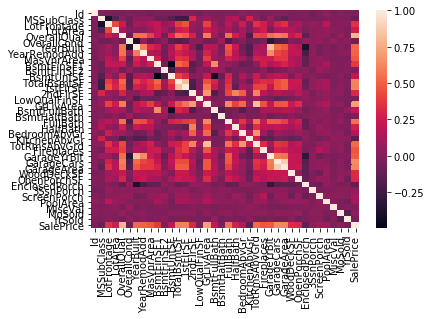

In [8]:
corr = house_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
def correlationHeatmap(aDF, Features, title):
    fig,ax = plt.subplots(figsize=(20,8))
    fig.suptitle("Heatmap Plot - "+title, fontsize=30)
    corrcoef = aDF[Features].corr()
    mask = np.array(corrcoef)
    mask[np.tril_indices_from(mask)] = False
# sns.heatmap(corrcoef, mask=mask, vmax=.8, square=True, annot=True, ax=ax)
    sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
    plt.show();

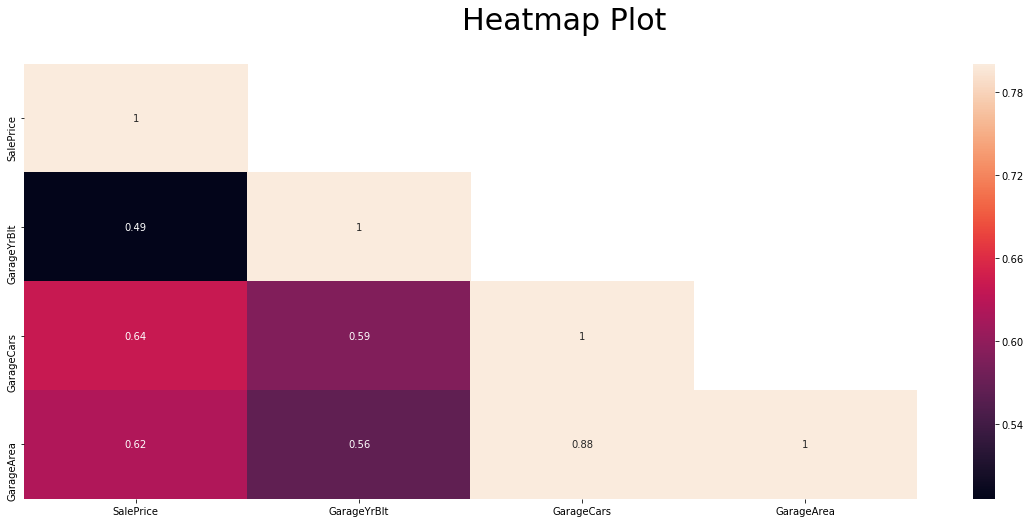

In [10]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
corrcoef = house_data[['SalePrice', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 
                         'GarageArea', 'GarageQual', 'GarageCond', 'GarageType']].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

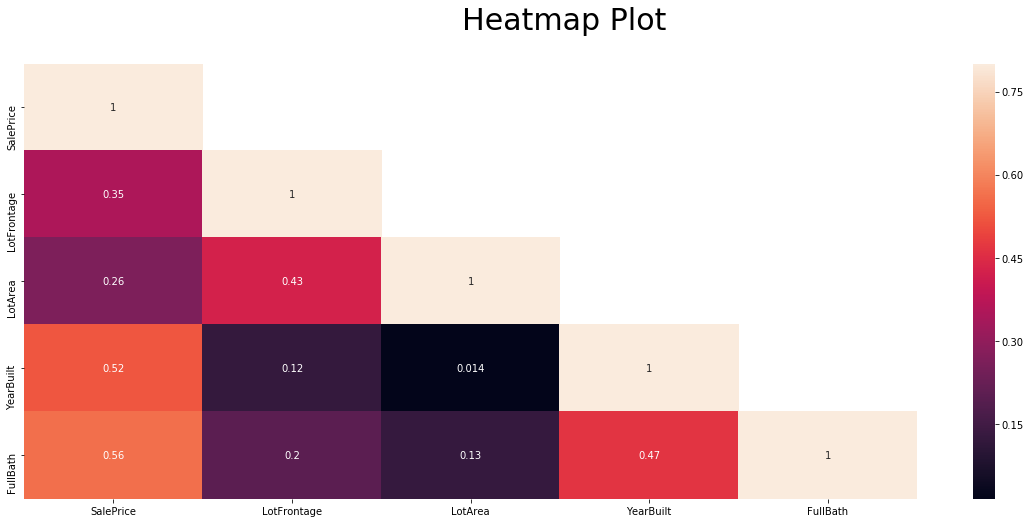

In [53]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
corrcoef = house_data[['SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 'FullBath']].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

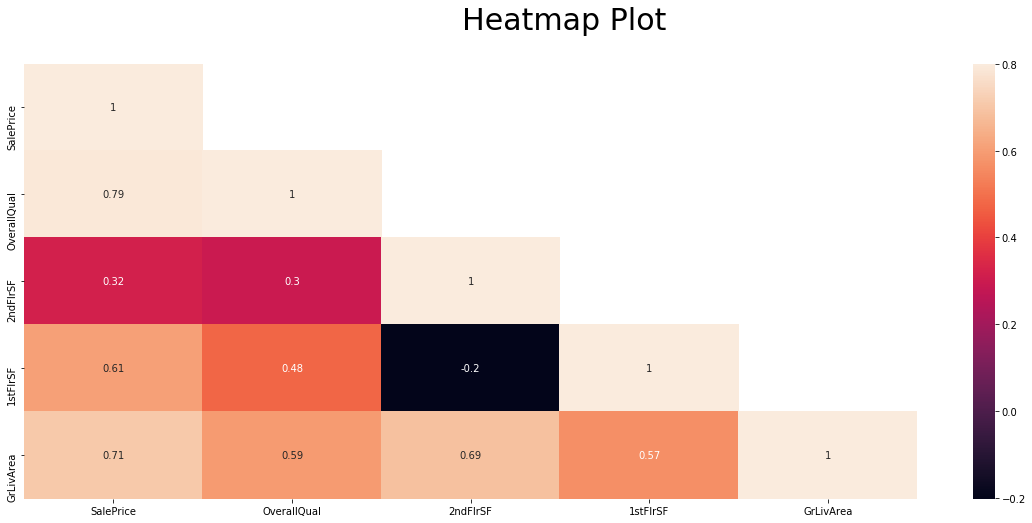

In [51]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
corrcoef = house_data[['SalePrice', 'OverallQual', '2ndFlrSF', '1stFlrSF', 'GrLivArea']].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

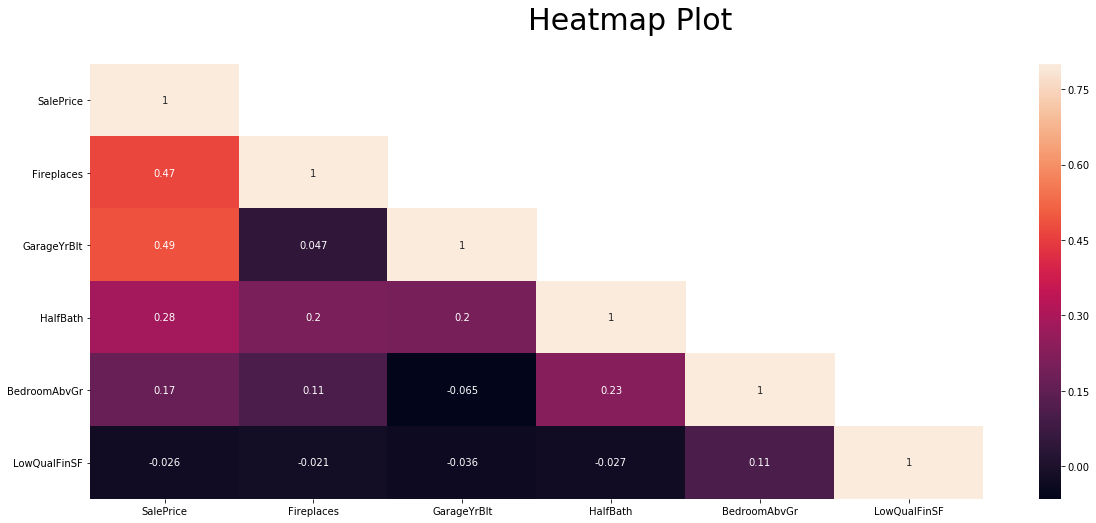

In [68]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Heatmap Plot", fontsize=30)
corrcoef = house_data[['SalePrice', 'Fireplaces', 'GarageYrBlt', 'HalfBath', 'BedroomAbvGr',]].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

In [14]:
house_data.drop(["MSSubClass", "OverallCond", "PoolArea", "SaleCondition", 
                 "GarageCond", "GarageQual", "GarageType"], axis=1, inplace = True) 

In [29]:
house_data.drop(["MoSold", "YrSold", "SaleType", "ScreenPorch", 
                 "MiscVal", "3SsnPorch", "KitchenAbvGr", "Exterior2nd"], axis=1, inplace = True) 

In [58]:
house_data.drop(["EnclosedPorch", "BsmtHalfBath"], axis=1, inplace = True) 

In [66]:
house_data.drop(["GarageFinish", "BsmtQual", 'BsmtFinSF2' ], axis=1, inplace = True) 

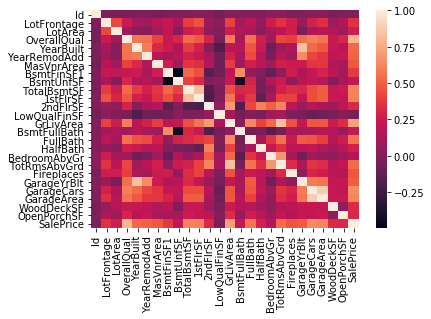

In [67]:
corr = house_data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [69]:
house_data.shape

(1460, 56)

### Selected Features 

Correlation SalePrice 
 * OverallQual - 80%
 * GrLivArea - 71%
 * GarrageCars - 64% 
 * GarrageArea - 62%
 * 1stFlrSF - 61%
 * FullBath - 56% 
 * TotRmsAbvGrd - 53%
 * YearBuilt - 52% 
 * YearRemodAdd - 51% 
 * GarageYrBlt - 49%
 * MasVnrArea - 48%
 * FirePlace - 47% 
 * LotFrontage - 35% 
 * WoodDeckSF - 32%
 * OpenPorchSF - 32% 
 * 2ndFlrSF - 32%
 * HalfBath - 28% 
 * LotArea - 26%
 * BedroomAbvGr - 17% 

In [76]:
Features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr", "SalePrice"]
house_data2 = house_data[Features]

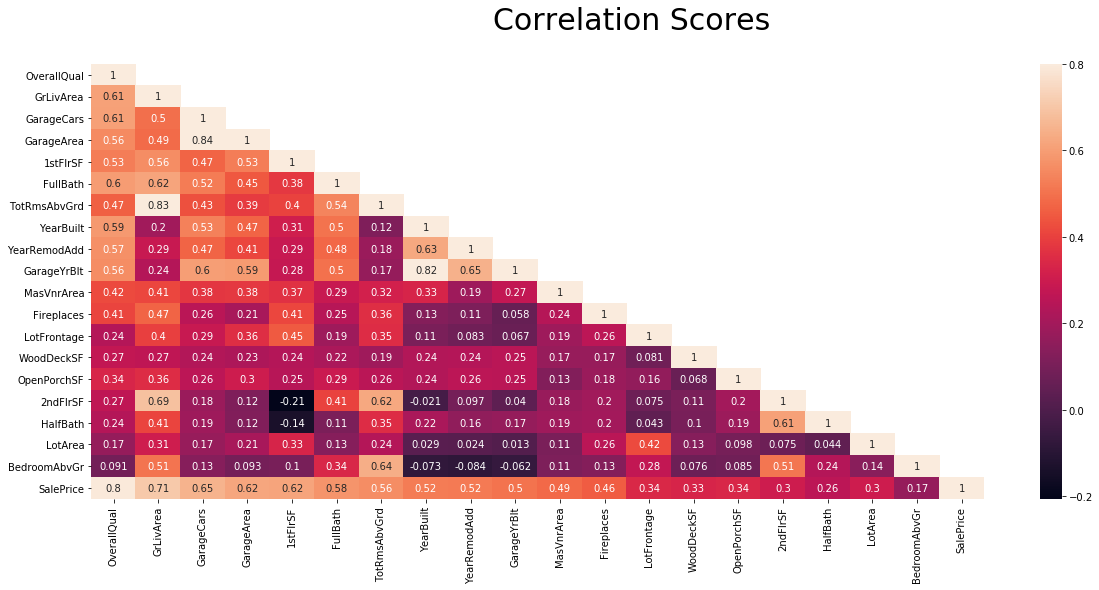

In [84]:
fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle("Correlation Scores", fontsize=30)
corrcoef = house_data2[Features].corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

In [82]:
house_data2 = house_data.dropna(axis=0)

In [83]:
house_data2.shape

(1094, 56)

# 3. Data  Visualization 

In [85]:
house_data2.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,70.759598,10132.346435,6.247715,1972.412249,1985.915905,109.855576,448.191956,606.117002,1099.561243,...,0.389397,2.861974,6.570384,0.610603,1978.565814,1.879342,503.760512,94.341865,46.946984,187033.263254
std,420.955488,24.508859,8212.249621,1.366797,31.189752,20.930772,190.667459,468.728095,445.834636,415.851262,...,0.500793,0.764107,1.584486,0.633118,25.934444,0.658586,192.261314,122.624615,64.820019,83165.332151
min,1.000000,21.000000,1300.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,105.000000,...,0.000000,0.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,35311.000000
25%,366.500000,60.000000,7606.750000,5.000000,1953.000000,1967.000000,0.000000,0.000000,270.000000,816.000000,...,0.000000,2.000000,5.000000,0.000000,1960.000000,1.000000,360.000000,0.000000,0.000000,132500.000000
50%,723.500000,70.000000,9444.500000,6.000000,1975.000000,1995.000000,0.000000,384.500000,525.000000,1023.000000,...,0.000000,3.000000,6.000000,1.000000,1982.000000,2.000000,484.000000,0.000000,28.000000,165750.000000
75%,1093.750000,80.000000,11387.250000,7.000000,2003.000000,2005.000000,171.750000,712.750000,846.000000,1345.500000,...,1.000000,3.000000,7.000000,1.000000,2003.000000,2.000000,602.500000,169.750000,68.000000,221000.000000
max,1460.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,2.000000,6.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000


# 4. Train 

In [86]:
house_features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr"]
X = house_data2[house_features]
Y = house_data2.SalePrice

### Building a model

In [88]:
house_model = DecisionTreeRegressor(random_state=1)
house_model.fit(X, Y) # Fit model 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

# 5. Prediction

In [90]:
house_test_file_path = 'test.csv'
house_test_data = pd.read_csv(house_file_path) 

In [92]:
Features = ["Id", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr", "SalePrice"]
house_test_data = house_test_data[Features]

In [98]:
side_by_side(house_test_data.isnull().sum(), house_test_data.count())

Id                0    Id              1460
OverallQual       0    OverallQual     1460
GrLivArea         0    GrLivArea       1460
GarageCars        0    GarageCars      1460
GarageArea        0    GarageArea      1460
1stFlrSF          0    1stFlrSF        1460
FullBath          0    FullBath        1460
TotRmsAbvGrd      0    TotRmsAbvGrd    1460
YearBuilt         0    YearBuilt       1460
YearRemodAdd      0    YearRemodAdd    1460
GarageYrBlt      81    GarageYrBlt     1379
MasVnrArea        8    MasVnrArea      1452
Fireplaces        0    Fireplaces      1460
LotFrontage     259    LotFrontage     1201
WoodDeckSF        0    WoodDeckSF      1460
OpenPorchSF       0    OpenPorchSF     1460
2ndFlrSF          0    2ndFlrSF        1460
HalfBath          0    HalfBath        1460
LotArea           0    LotArea         1460
BedroomAbvGr      0    BedroomAbvGr    1460
SalePrice         0    SalePrice       1460
dtype: int64           dtype: int64        



In [99]:
house_test_data = house_test_data.dropna(axis=0)

In [101]:
house_test_data.shape

(1121, 21)

In [100]:
Features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr"]
X = house_test_data[Features]
Y = house_test_data.SalePrice

accuracyModel = house_model.score(X, Y)
print("accuracy = ", accuracyModel * 100,"%")

accuracy =  99.64092250252537 %


# Accuracy 99.64%

# 6. Submit to Kaggle

In [103]:
predicted_prices = house_model.predict(X)

In [104]:
len(predicted_prices)

1121

In [123]:
submission_data = pd.DataFrame()


In [124]:
submission_data["ID"] = house_test_data["Id"]
submission_data["SalePrice"] = 0.0

In [139]:
for i in range(0, len(predicted_prices)):
    submission_data["SalePrice"].iloc[i] = predicted_prices[i]

In [141]:
submission_data.to_csv('submission.csv')

##### Failed when I submitted to Kaggle because I deleted rows with Null values 

## ReSubmit to Kaggle 

In [145]:
house_test_file_path = 'test.csv'
house_test_data2 = pd.read_csv(house_file_path) 
Features = ["Id", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr", "SalePrice"]
house_test_data2 = house_test_data2[Features]

house_test_data2.fillna(0, inplace=True) # this time, I fill with zero when there is NaN 
house_test_data2.shape

(1460, 21)

In [152]:
Features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
            "YearBuilt", "YearRemodAdd", "GarageYrBlt","MasVnrArea", "Fireplaces", "LotFrontage","WoodDeckSF",
           "OpenPorchSF", "2ndFlrSF", "HalfBath", "LotArea", "BedroomAbvGr"]
X = house_test_data2[Features]
Y = house_test_data2.SalePrice

accuracyModel = house_model.score(X, Y)
print("accuracy = ", accuracyModel * 100,"%")

accuracy =  94.15685359027418 %


#### Because of nt deliting Null values, accuracy decreased to 94%

In [154]:
predicted_prices = house_model.predict(X)
len(predicted_prices)

1460

In [158]:
submission_data = pd.DataFrame()
submission_data["ID"] = house_test_data2["Id"]
submission_data["SalePrice"] = 0.0

In [163]:
submission_data.shape

(1460, 2)

In [164]:
for i in range(0, len(predicted_prices)):
    submission_data["SalePrice"].iloc[i] = predicted_prices[i]

In [165]:
submission_data.to_csv('submission.csv')